# Churn Analysis for telco

[Download Dataset](http://www.iainpardoe.com/teaching/dsc433/data/Churn.xls)

If you want to tinker with other datasets check out this:
[More Datasets](http://www.iainpardoe.com/teaching/dsc433/data/)


### Churn rate: the business terminology to describe the rate in which customers stop paying or using products or services. It is a crucial rate because retaining churnning customers is usually cheaper then acquiring new customers.

![title](services_pic.gif)

### Churn erodes profitability
#### Churn costs AT&T, Verizon, Comcast and Time Warner Cable billions of dollars every year.

 • Roughly 75% of the subscribers signing up every year come from another network—they are already churners.

 • The churn rate in developing markets ranges from 20% to 70%. In some of these markets more than 90% of all mobile subscribers are on prepaid service. Some operators in developing markets lose in aggregate their entire subscriber base to churn in a year.

# Research Questions:
 #### 1. Whats the distribution of our cutomers (duration wise)?
 #### 2. Is there any correlation between churn and Intl. plan?
 #### 3. Is there any relationship between International minutes and customer service calls ?
 #### 4. Is there any relationship between Account Length and customer service calls ?
 #### 5. What relevant questions do you want to add ?

# 1. Upload the data from excel into a pandas dataframe

In [6]:
import numpy as np
import pandas as pd
import seaborn as se
import bokeh as bk
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
df = pd.read_excel("Churn.xls")

df.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Churn  Int'l Plan  VMail Plan    ...     Day Charge  \
0               1      0           0           1    ...          45.07   
1               1      0           0           1    ...          27.47   
2               0      0           0           0    ...          41.38   
3               2      0           1           0    ...          50.90   
4               3      0           1           0    ...          28.34   

   Eve Calls  Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  \
0         99       16.78           91         11.01           3         2.70   
1        103       16.62          103         11.45           3         3.70   
2        110       10.30          104          7.32           5         3.29   
3         88        5.26           89          8.86           7         1.78   
4        122       12.61          121          8.41           3         2.73   

   State Area Code     Phone  
0     KS       415  382-4657  
1     OH       415  371-7191  
2     NJ       415  358-1921  
3     OH       408  375-9999  
4     OK       415  330-6626  

[5 rows x 21 columns]

#### Each row is a subscribing telephone customer, each column describes the attributes of the subscription.

#### Attributes:

 - State : Code of the States in USA.
 - Account Length : Duration of the account.
 - Area Code : Area code of the subscriber.
 - Int'l Plan : Subscribed to international plan.
 - VMail Plan : Subscribed to voice mail plan.
 - VMail Message : Number of voice mail messages.
 - Day Mins : Number of calling minutes during day.
 - Day Calls : Number of calls during day.
 - Day Charge : Charges during day.
 - Eve Mins : Number of calling minutes during evening.
 - Eve Calls : Number of calls during evening.
 - Eve Charge : Charges during evening.
 - Night Mins : Number of calling minutes during night.
 - Night Calls : Number of calls during night.
 - Night Charge : Charges during night.
 - Intl Mins : Number of international calling minutes.
 - Intl Calls : Number of international calls.
 - Intl Charge : Charges from international calls.
 - CustServ Calls : Customer service calls made.
 - Churn? : Churned, yes or no!

In [7]:
#let check for missing values and read the data types of our attributes/features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [16]:
#let's look at the max and min Account Length
print(df['Account Length'].min())
print(df['Account Length'].max())

1
243


In [17]:
target = df['Churn'].values

[0 0 0 ..., 0 0 0]


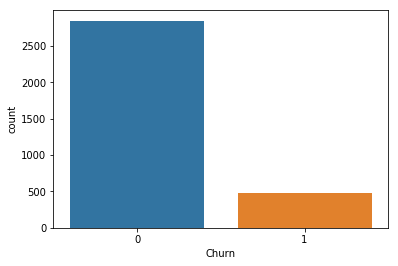

In [26]:
se.countplot(x = 'Churn', data = df)

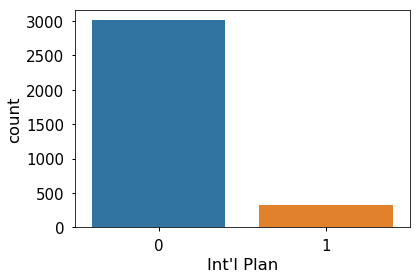

In [54]:
se.countplot(x = 'Int\'l Plan', data = df)

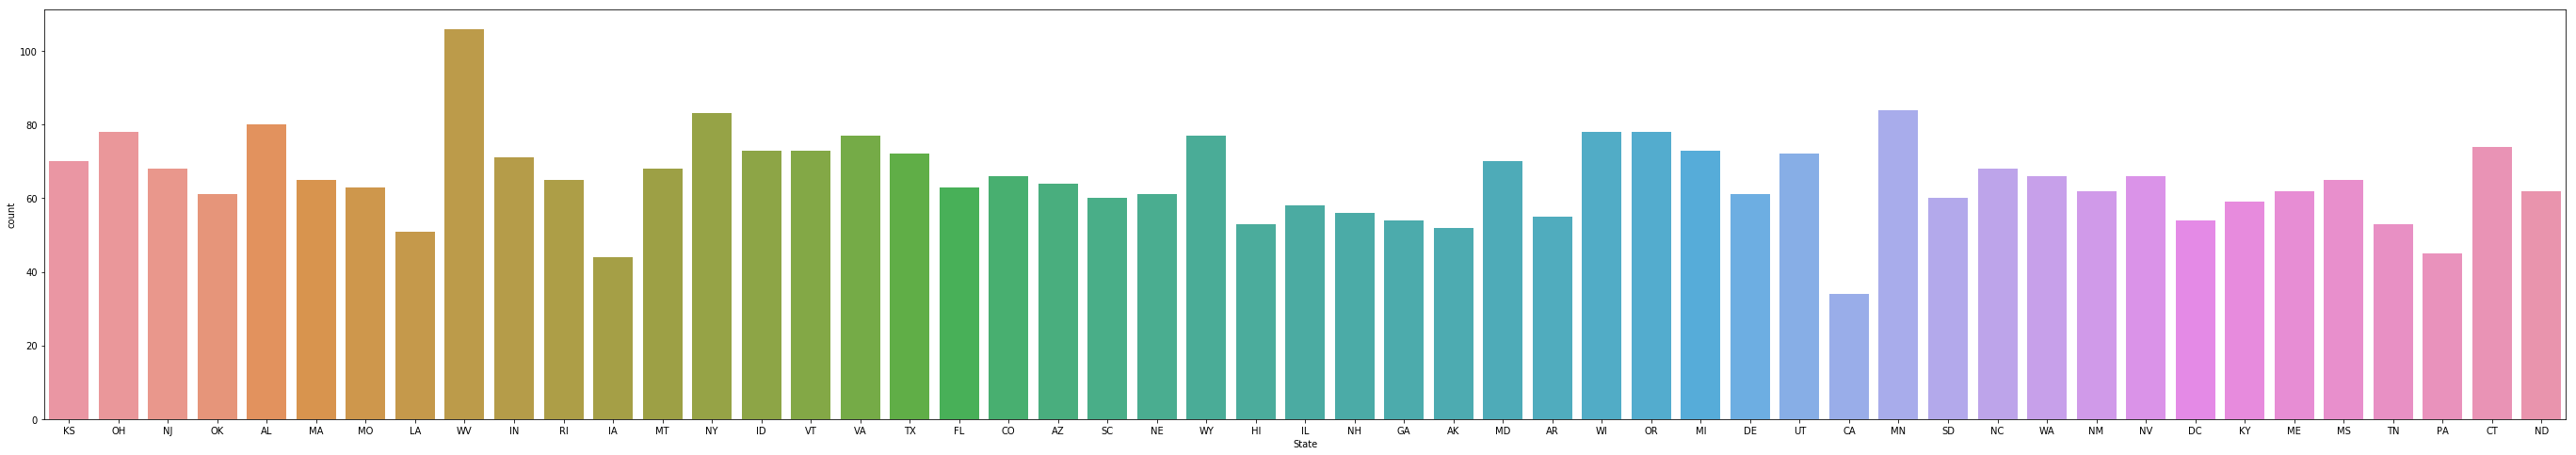

In [28]:
plt.figure(figsize=(48, 8))

se.countplot(x = 'State', data = df)

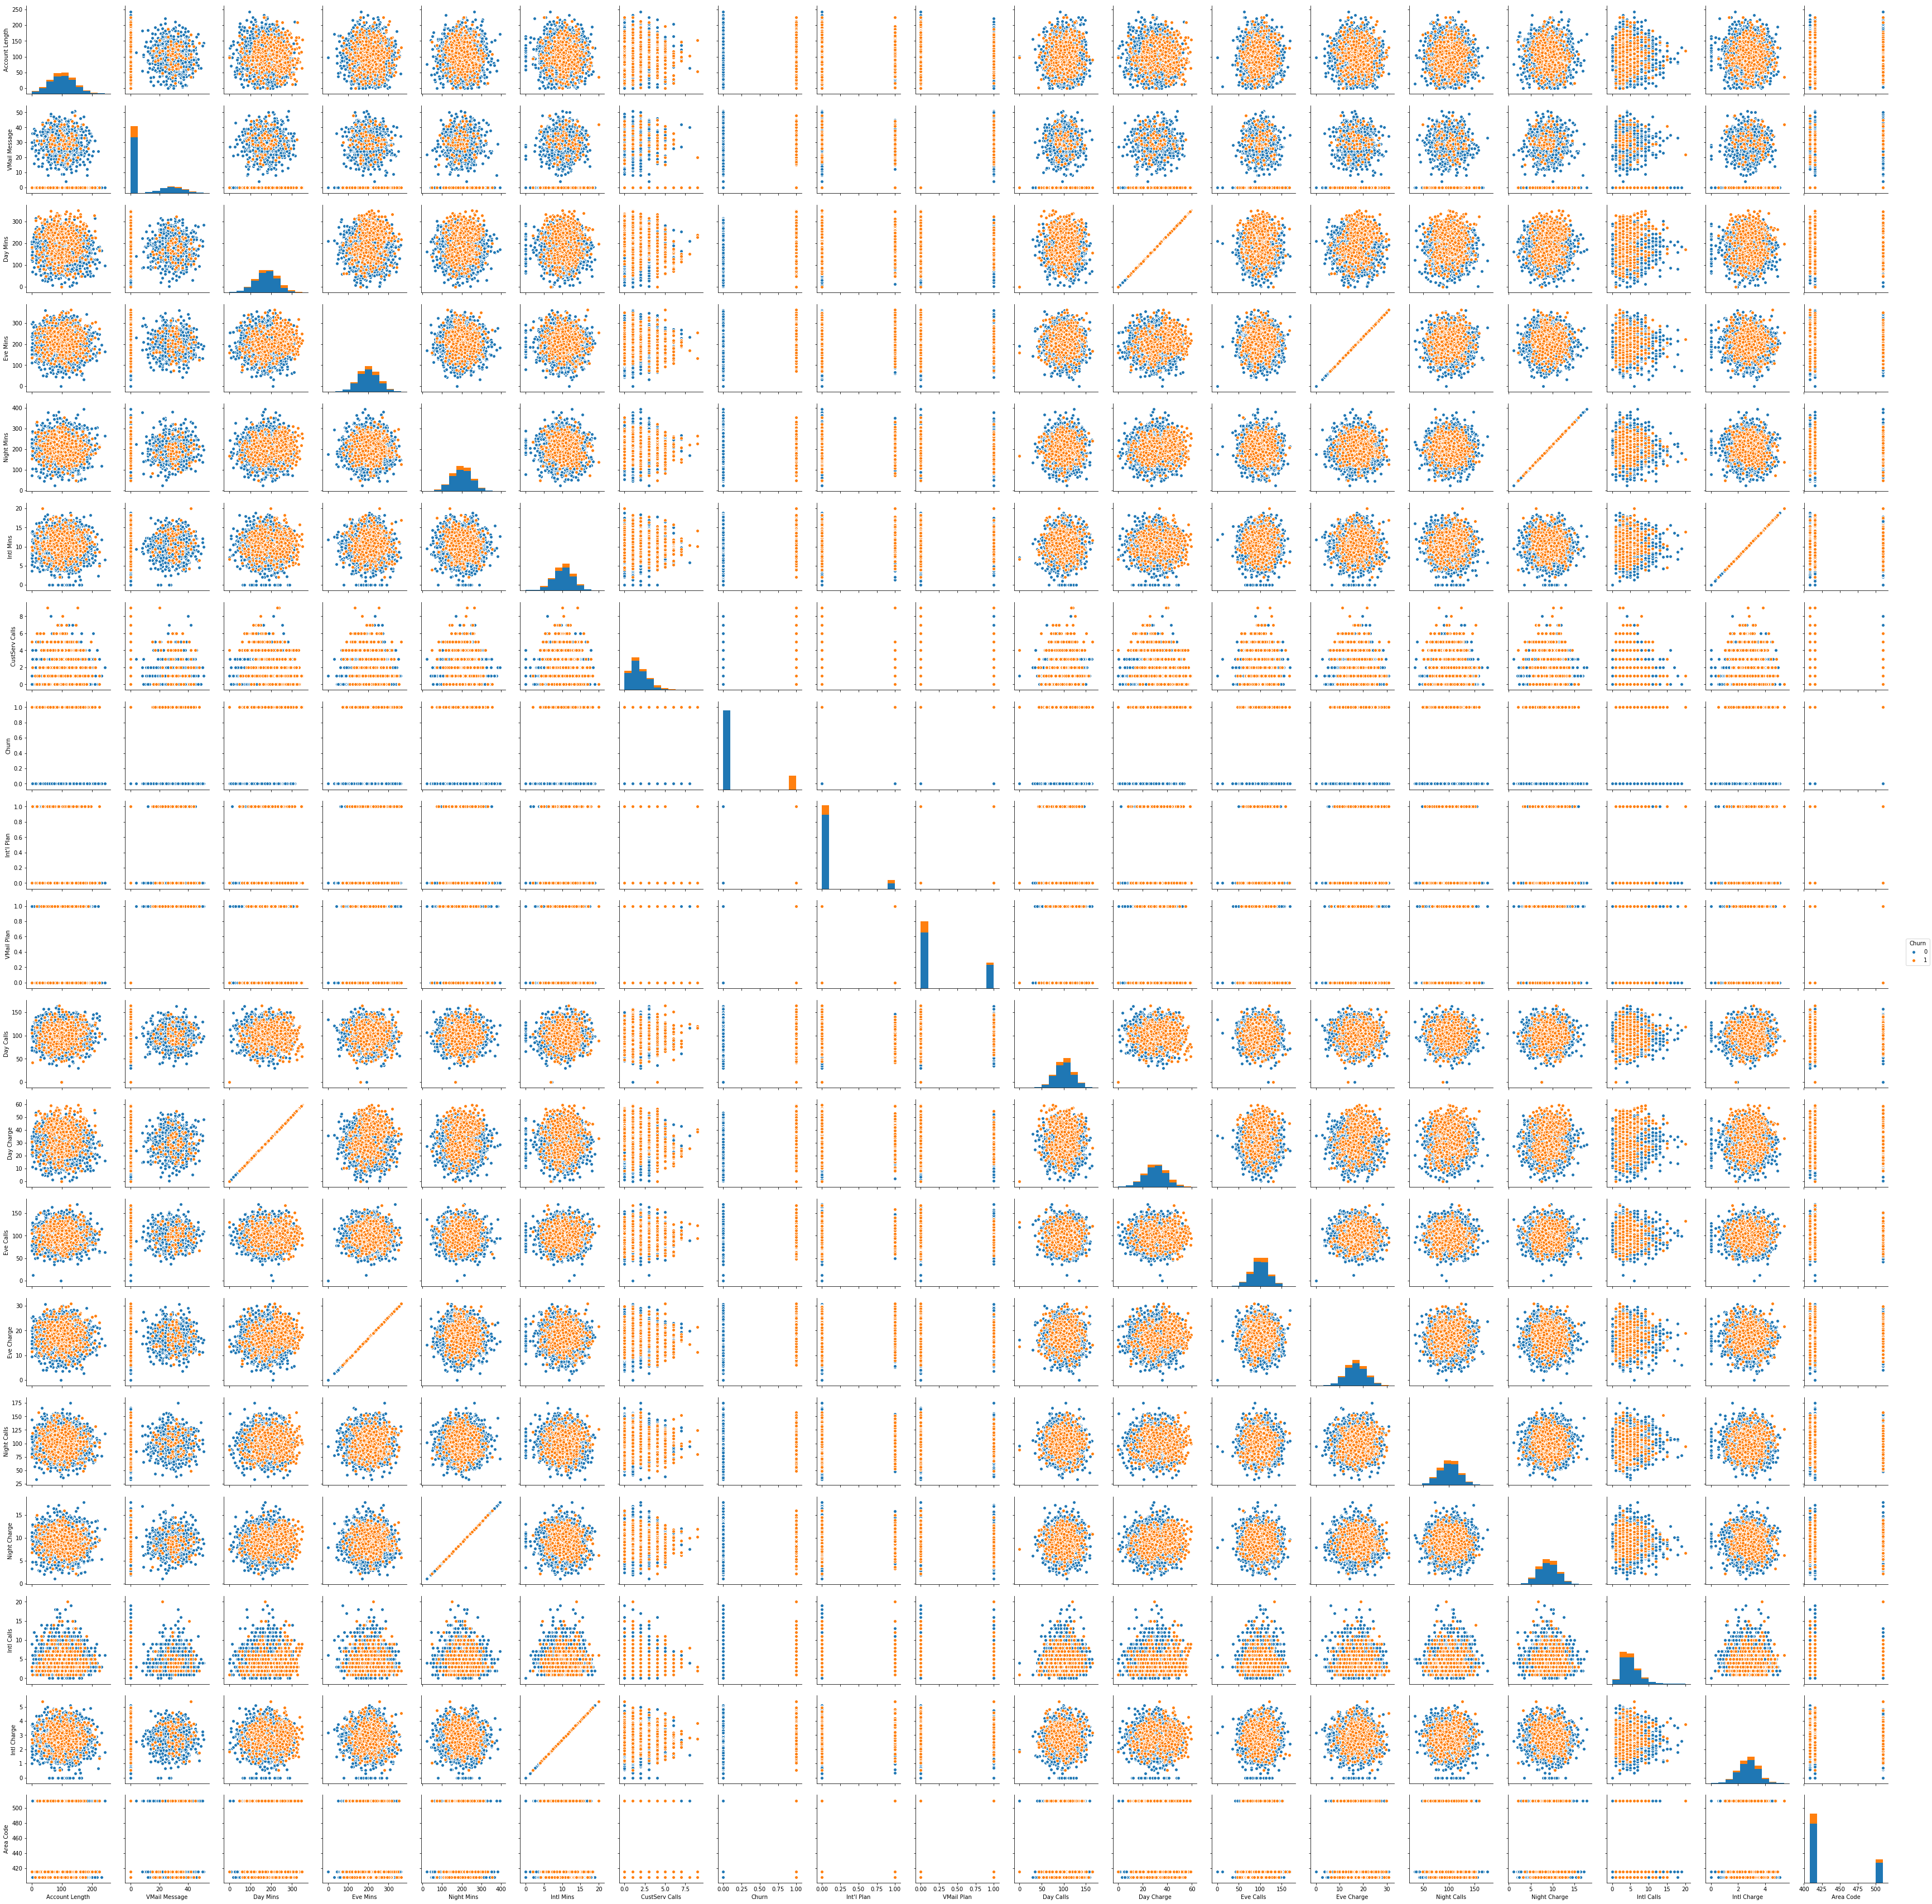

In [34]:
se.pairplot(df, hue="Churn")

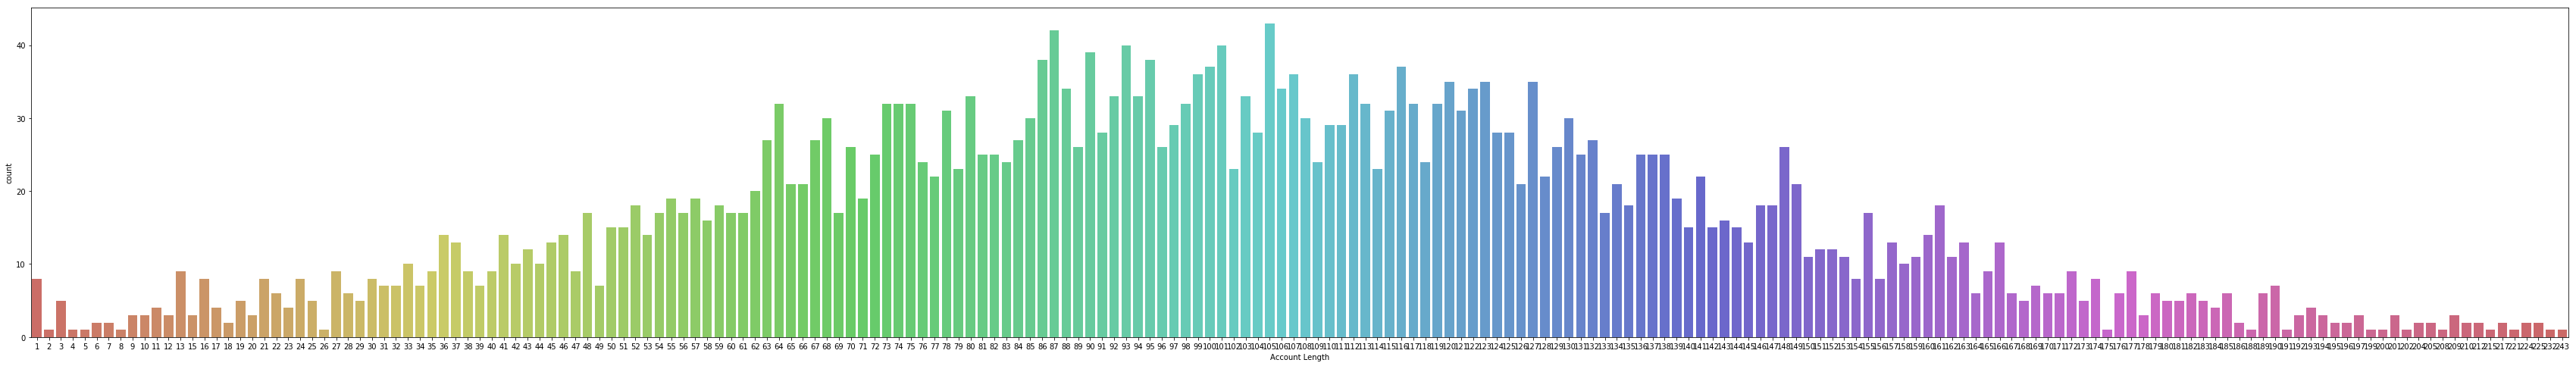

In [38]:
plt.figure(figsize=(60, 8))

se.countplot(x='Account Length',data=df, palette='hls')

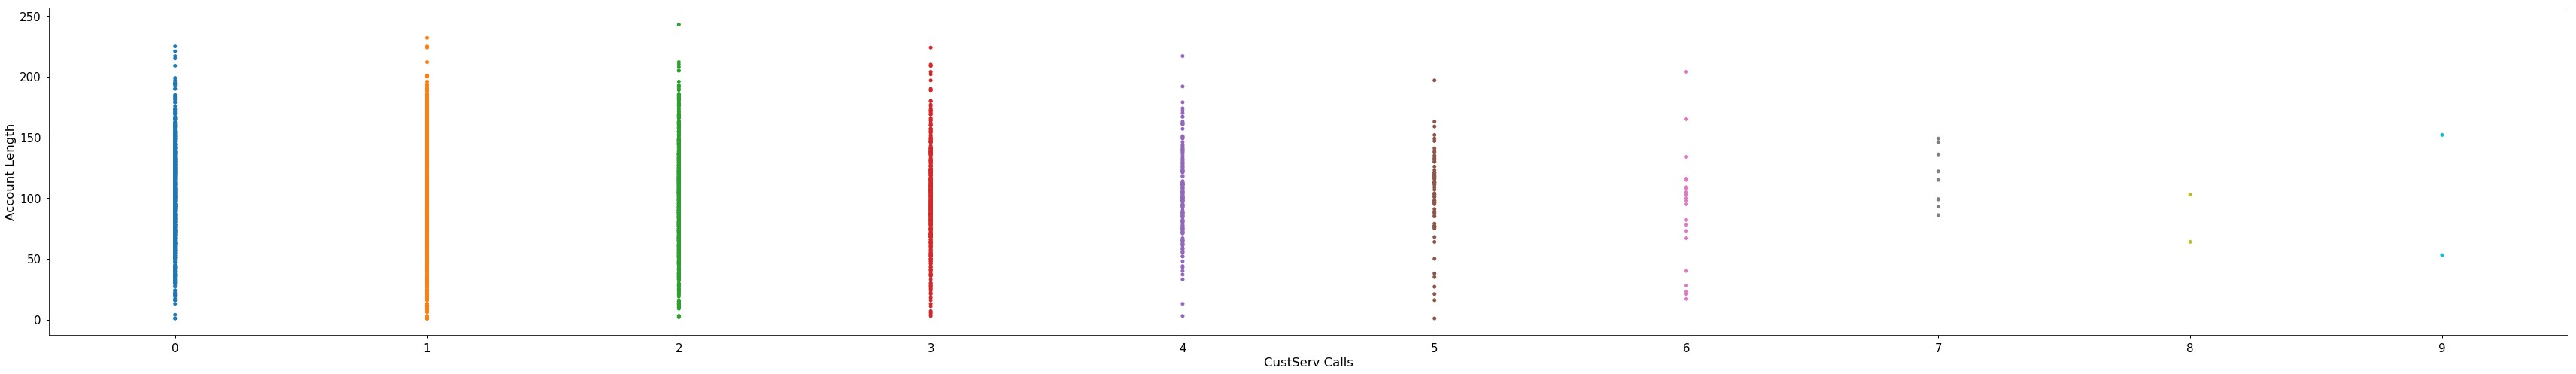

In [44]:
plt.figure(figsize=(60, 8))
se.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
se.stripplot(x="CustServ Calls", y="Account Length", data=df);

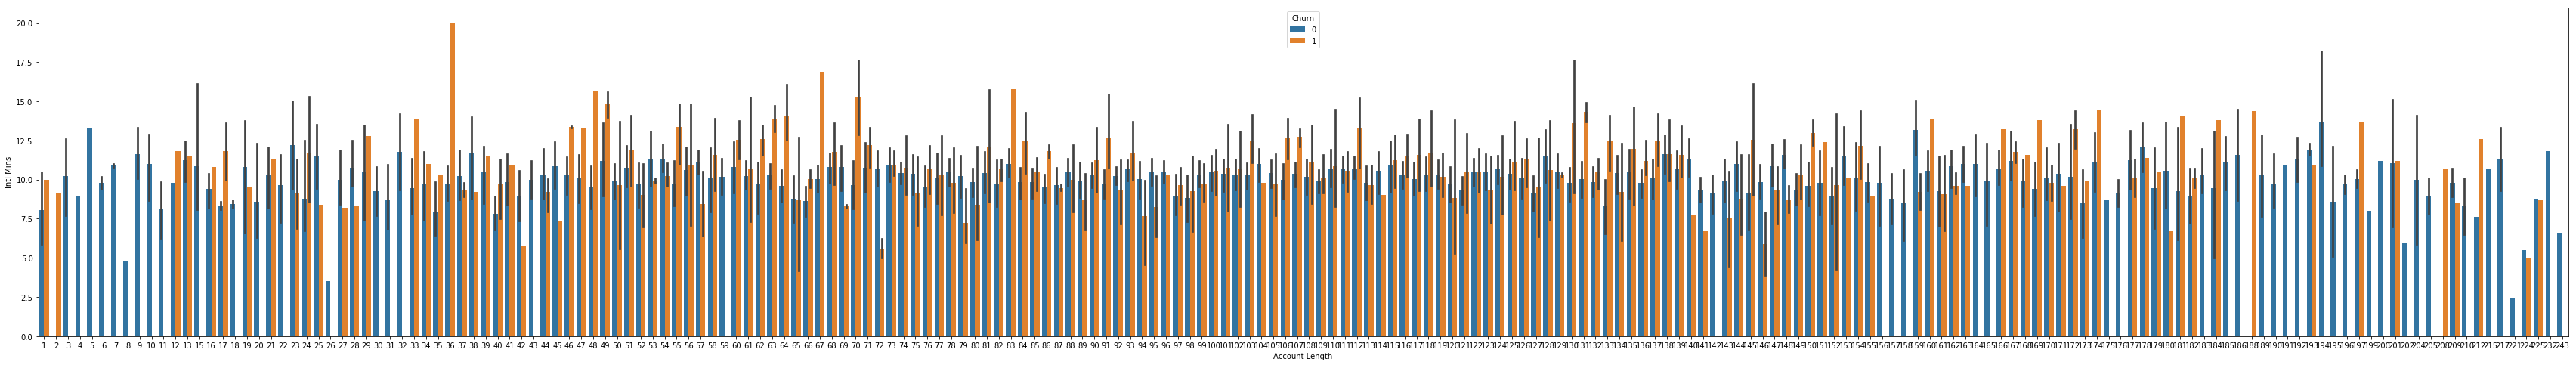

In [42]:
plt.figure(figsize=(60, 8))
se.barplot(x="Account Length", y = 'Intl Mins', hue="Churn", data=df);

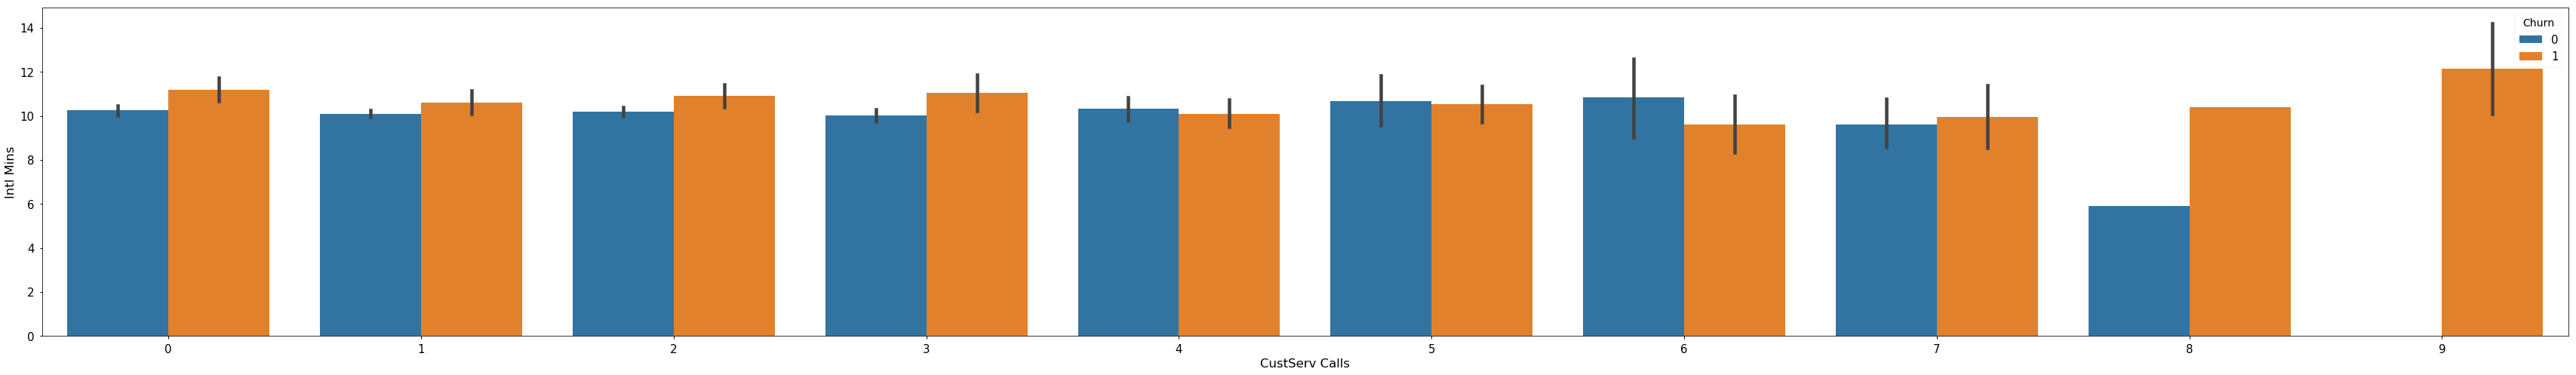

In [45]:
plt.figure(figsize=(60, 8))
se.barplot(x="CustServ Calls", y = 'Intl Mins', hue="Churn", data=df);

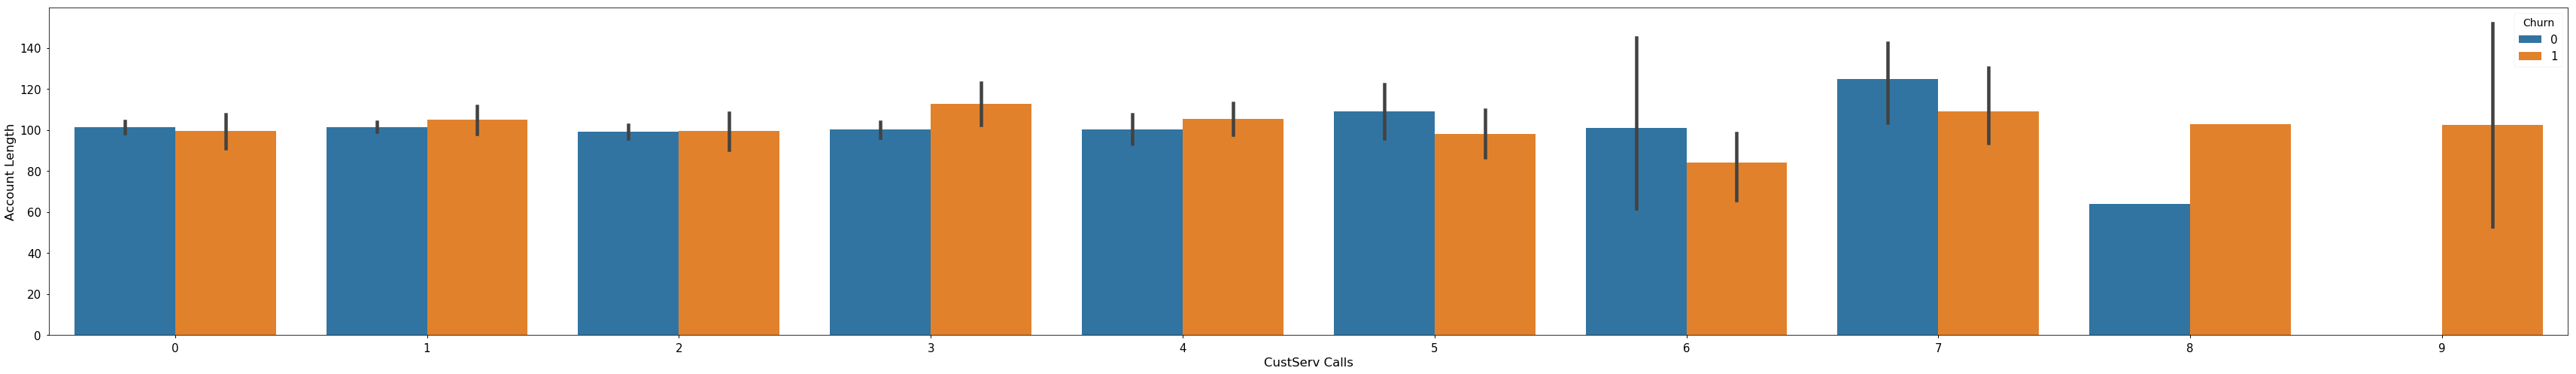

In [46]:
plt.figure(figsize=(60, 8))
se.barplot(x="CustServ Calls", y = 'Account Length', hue="Churn", data=df);

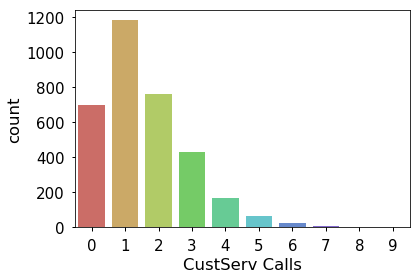

In [49]:
se.countplot(x='CustServ Calls',data=df, palette='hls')

### Let's research some groups, say people less than 50 days

In [50]:
short = df.loc[df['Account Length'] < 50]
short.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
28              20              0     190.0     258.2       181.5        6.3   
29              49              0     119.3     215.1       178.7       11.1   
33              12              0     249.6     252.4       280.2       11.8   
36              36             30     146.3     162.5       129.3       14.5   
42              34              0     124.8     282.2       311.5       10.0   

    CustServ Calls  Churn  Int'l Plan  VMail Plan    ...     Day Charge  \
28               0      0           0           0    ...          32.30   
29               1      0           0           0    ...          20.28   
33               1      1           0           0    ...          42.43   
36               0      0           0           1    ...          24.87   
42               2      0           0           0    ...          21.22   

    Eve Calls  Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  \
28         84       21.95          102          8.17           6         1.70   
29        109       18.28           90          8.04           1         3.00   
33        119       21.45           90         12.61           3         3.19   
36         80       13.81          109          5.82           6         3.92   
42         98       23.99           78         14.02           4         2.70   

    State Area Code     Phone  
28     MO       415  353-2630  
29     HI       510  410-7789  
33     AZ       408  360-1596  
36     AK       408  341-9764  
42     AR       510  353-7289  

[5 rows x 21 columns]

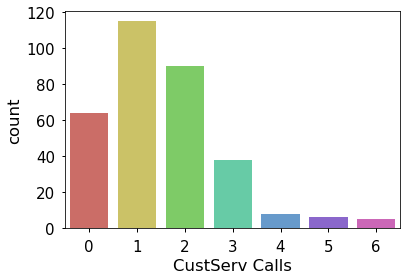

In [51]:
#How often these people make a call to customer service
se.countplot(x='CustServ Calls',data=short, palette='hls')

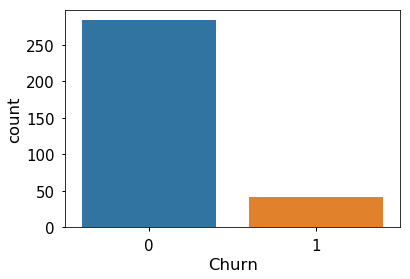

In [52]:
#how many actually churn in this phase (50 days and below) Visual and discreet answer
se.countplot(x = 'Churn', data = short)

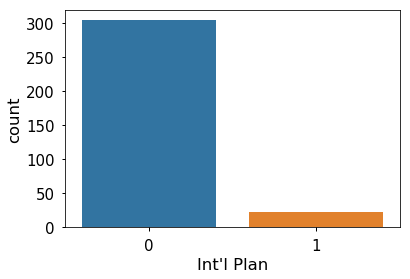

In [53]:
#how many of them are using Intl. plan?
se.countplot(x = 'Int\'l Plan', data = short)

### let's build out dataset, I think we need to engineer a new feature that is total calls, total minutes.

In [59]:
df['TotalCalls'] = df['Day Calls'] + df['Eve Calls'] + df['Night Calls'] + df['Intl Calls']
df['TotalMins'] = df['Day Mins'] + df['Eve Mins'] + df['Night Mins'] + df['Intl Mins']
df['TotalChrages'] = df['Day Charge'] + df['Eve Charge'] + df['Night Charge'] + df['Intl Charge']

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
TotalCalls        3333 non-null int64
TotalMins         3333 non-null float64

### Will these new feauters boost the performance of our model ?
##### We will never know but its something the comes to our mind, so lets include an experiment with and another without the newly cooked feautres.

# Warning:
    We must get our data to be in a numeric format

In [68]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['State'] = number.fit_transform(df['State'].astype('str'))

# Do we need the phone numbers?

In [103]:
df = df.drop(['Phone', 'Area Code'], axis =1)

# Warning what is the focal point of our analysis?

#### Thats right our label/target is the churn column.

In [70]:
labels = df['Churn']

In [71]:
df = df.drop(['Churn'], axis =1)

In [72]:
df.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Int'l Plan  VMail Plan  Day Calls      ...       \
0               1           0           1        110      ...        
1               1           0           1        123      ...        
2               0           0           0        114      ...        
3               2           1           0         71      ...        
4               3           1           0        113      ...        

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  State  \
0       16.78           91         11.01           3         2.70      8   
1       16.62          103         11.45           3         3.70     29   
2       10.30          104          7.32           5         3.29     25   
3        5.26           89          8.86           7         1.78     29   
4       12.61          121          8.41           3         2.73     30   

   Area Code  TotalCalls  TotalMins  TotalChrages  
0        415         303      717.2         75.56  
1        415         332      625.2         59.24  
2        415         333      539.4         62.29  
3        408         255      564.8         66.80  
4        415         359      512.0         52.09  

[5 rows x 22 columns]

In [73]:
labels

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3303    0
3304    1
3305    0
3306    0
3307    0
3308    0
3309    0
3310    0
3311    0
3312    0
3313    0
3314    0
3315    0
3316    0
3317    0
3318    0
3319    0
3320    1
3321    0
3322    1
3323    1
3324    0
3325    0
3326    0
3327    0
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

## We need to split the data into a training and testing samples.

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.30)

In [105]:
from sklearn import tree

DTclf = tree.DecisionTreeClassifier()

DTclf = DTclf.fit(X_train, y_train)

In [106]:
accuracy = DTclf.score(X_train, y_train)
print('Accuracy of DT in training is: ', accuracy*100, '%')

Accuracy of DT in training is:  100.0 %


In [107]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ypredict = DTclf.predict(X_train)
print ('\n Training classification report\n', classification_report(y_train, ypredict))
print ("\n Confusion matrix of training \n", confusion_matrix(y_train, ypredict))


 Training classification report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      1992
          1       1.00      1.00      1.00       341

avg / total       1.00      1.00      1.00      2333


 Confusion matrix of training 
 [[1992    0]
 [   0  341]]


In [108]:
accuracy = DTclf.score(X_test, y_test)
print('Accuracy of DT in testing is: ', accuracy*100, '%')

ypredict = DTclf.predict(X_test)
print ('\n Testing classification report\n', classification_report(y_test, ypredict))
print ("\n Confusion matrix of testing \n", confusion_matrix(y_test, ypredict))

Accuracy of DT in testing is:  95.6 %

 Testing classification report
              precision    recall  f1-score   support

          0       0.98      0.97      0.97       858
          1       0.84      0.86      0.85       142

avg / total       0.96      0.96      0.96      1000


 Confusion matrix of testing 
 [[834  24]
 [ 20 122]]


In [109]:
from sklearn.svm import LinearSVC

linSVM = LinearSVC()
linSVM.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [110]:
accuracy = linSVM.score(X_train, y_train)
print('Accuracy of Linear SVM in training is: ', accuracy*100, '%')

ypredict = linSVM.predict(X_train)
print ('\n Training classification report\n', classification_report(y_train, ypredict))
print ("\n Confusion matrix of training \n", confusion_matrix(y_train, ypredict))

Accuracy of Linear SVM in training is:  85.3836262323 %

 Training classification report
              precision    recall  f1-score   support

          0       0.85      1.00      0.92      1992
          1       0.00      0.00      0.00       341

avg / total       0.73      0.85      0.79      2333


 Confusion matrix of training 
 [[1992    0]
 [ 341    0]]


In [111]:
accuracy = linSVM.score(X_test, y_test)
print('Accuracy of DT in testing is: ', accuracy*100, '%')

ypredict = linSVM.predict(X_test)
print ('\n Testing classification report\n', classification_report(y_test, ypredict))
print ("\n Confusion matrix of testing \n", confusion_matrix(y_test, ypredict))

Accuracy of DT in testing is:  85.8 %

 Testing classification report
              precision    recall  f1-score   support

          0       0.86      1.00      0.92       858
          1       0.00      0.00      0.00       142

avg / total       0.74      0.86      0.79      1000


 Confusion matrix of testing 
 [[858   0]
 [142   0]]


In [112]:
predictions = ypredict

In [100]:
df.to_csv('Telco churn')

# What is the most relevant attribute in this analysis ?

importance          labels
20    0.430294    TotalChrages
1     0.120283   VMail Message
6     0.092906  CustServ Calls
16    0.086147     Intl Charge
15    0.074499      Intl Calls
7     0.073623      Int'l Plan
9     0.024416       Day Calls
17    0.015047           State
18    0.012170      TotalCalls
3     0.010808        Eve Mins
4     0.008737      Night Mins
14    0.008049    Night Charge
12    0.007205      Eve Charge
13    0.007041     Night Calls
11    0.007010       Eve Calls
0     0.006969  Account Length
5     0.005784       Intl Mins
10    0.003277      Day Charge
2     0.003233        Day Mins

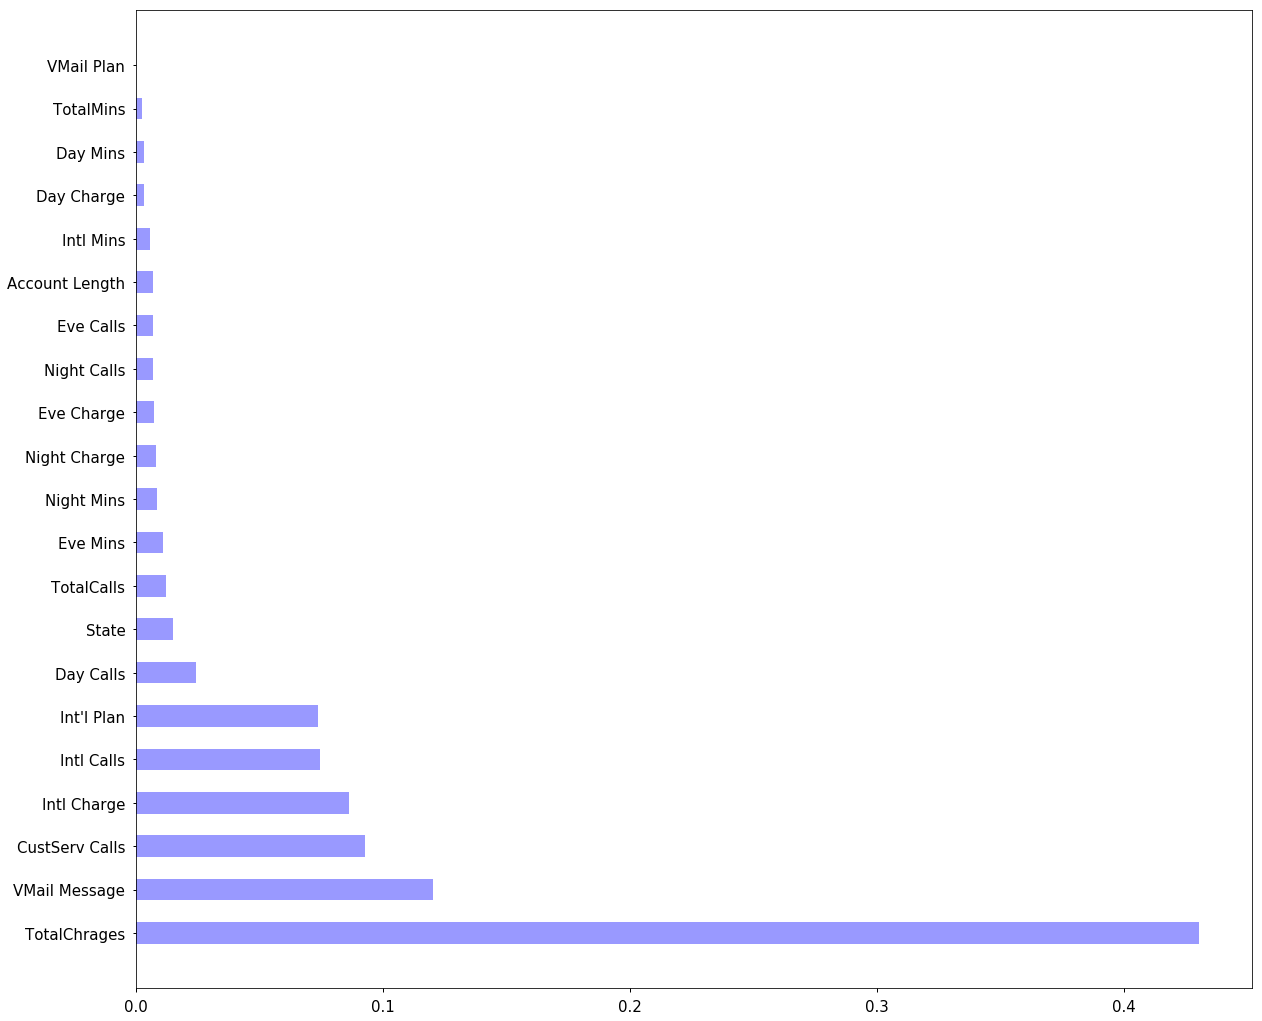

In [119]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(DTclf.feature_importances_, columns=["importance"])
df_f["labels"] = df.columns
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(19))

index = np.arange(len(DTclf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()